In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [43]:
df=pd.read_csv(r"C:\Users\Vishal S\Downloads\archive (11)\hearing_test.csv")
df

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1
...,...,...,...
4995,73.0,3.9,0
4996,57.0,33.9,1
4997,49.0,34.5,1
4998,38.0,46.4,1


In [44]:
df.shape

(5000, 3)

In [45]:
df.isnull().sum()

age               0
physical_score    0
test_result       0
dtype: int64

In [46]:
df.dtypes

age               float64
physical_score    float64
test_result         int64
dtype: object

In [47]:
X=df[['age','physical_score']]
Y=df['test_result']

In [48]:
X

,age,physical_score
0,33.0,40.7
1,50.0,37.2
2,52.0,24.7
3,56.0,31.0
4,35.0,42.9
...,...,...
4995,73.0,3.9
4996,57.0,33.9
4997,49.0,34.5
4998,38.0,46.4


In [49]:
Y

0       1
1       1
2       0
3       0
4       1
       ..
4995    0
4996    1
4997    1
4998    1
4999    1
Name: test_result, Length: 5000, dtype: int64

In [50]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=12)

In [51]:
scale=StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

In [52]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [53]:
y_pred = model.predict(x_test)

In [54]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.924


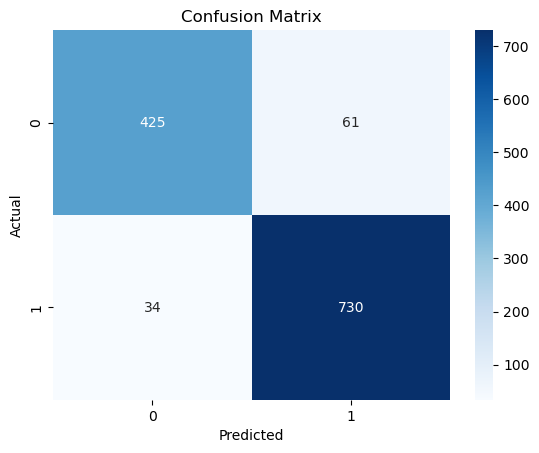

In [55]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [56]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90       486
           1       0.92      0.96      0.94       764

    accuracy                           0.92      1250
   macro avg       0.92      0.91      0.92      1250
weighted avg       0.92      0.92      0.92      1250



In [57]:
new_data = np.array([[69, 16.88]])  
new_data_scaled = scale.transform(new_data)
prediction = model.predict(new_data_scaled)
print("Predicted Test Result:", "1" if prediction[0] == 1 else "0")

Predicted Test Result: 0


In [58]:
from pickle import dump
from pickle import load

In [59]:
dump(model, open('Logmodel.pkl','wb'))

In [60]:
loaded_model=load(open('Logmodel.pkl','rb'))
result=loaded_model.score(X,Y)
print(result)

0.6332
